### **Importing the libraries and reading in the data**

In [13]:
#Importing the libraries required for this project.

import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')

In [6]:
#Reading in the data.

df = pd.read_csv('/content/drive/MyDrive/Colab/7 GMS Pricing Analysis/SalesData.csv')




---



###  **Cleaning the data**

In [7]:
#Reviewing the columns for any missing data.

df.isnull().sum()

item_id                         0
item_name                       0
event_date                      0
event_timestamp                 0
price_in_usd                  448
item_revenue_in_usd           448
item_category                 230
sold_quantity_on_that_date    448
dtype: int64

In [8]:
# Drop rows with missing values in the specified columns
df.dropna(subset=['price_in_usd', 'sold_quantity_on_that_date'])

# Confirm that the rows with missing values have been removed
df.isnull().sum()

df

,item_id,item_name,event_date,event_timestamp,price_in_usd,item_revenue_in_usd,item_category,sold_quantity_on_that_date
0,9195842,Google Pen Bright Blue,20210128,1611811435100563,2.0,4.0,NaN,2.0
1,9188233,Google Phone Stand Bamboo,20210126,1611637761201507,4.0,8.0,NaN,2.0
2,9195209,Google Tudes Recycled Tee,20210126,1611634344081188,24.0,48.0,NaN,2.0
3,9195912,Womens Google Striped LS,20210125,1611616699784421,16.0,32.0,NaN,2.0
4,9195714,Google Women's Eco Tee Black,20210125,1611616699784421,18.0,35.0,NaN,2.0
...,...,...,...,...,...,...,...,...
15952,9184831,Google Light Pen Green,20201106,1604633986145021,2.0,6.0,Writing Instruments,3.0
15953,9197329,#IamRemarkable Pen,20201104,1604493031400230,14.0,14.0,Writing Instruments,1.0
15954,9197329,#IamRemarkable Pen,20201104,1604492809128573,14.0,14.0,Writing Instruments,1.0
15955,9184830,Google Light Pen Red,20201103,1604386103216301,2.0,2.0,Writing Instruments,1.0




---



###  **Identify the Top 5 items**

In [9]:
# Group by item_name and aggregate the total sold quantity for each item
total_sales_per_item = df.groupby('item_name')['sold_quantity_on_that_date'].sum()

# Sort the items by total sales quantity in descending order and pick the top 5
top_5_items = total_sales_per_item.sort_values(ascending=False).head(5)

top_5_items

item_name
Google Clear Pen 4-Pack                  444.0
Google Laptop and Cell Phone Stickers    416.0
Google Metallic Notebook Set             365.0
Google Pen White                         340.0
Google Sunglasses                        322.0
Name: sold_quantity_on_that_date, dtype: float64



---



### **Regression Analysis**

In [10]:
# Dictionary to store model results for each item
regression_results = {}

# Iterate over each of the top 5 items
for item in top_5_items.index:
    item_data = df[df['item_name'] == item]

    # Splitting the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(item_data[['price_in_usd']], item_data['sold_quantity_on_that_date'], test_size=0.2, random_state=42)

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = model.predict(X_test)

    # Calculate mean squared error and R^2 score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    regression_results[item] = {
        'Coefficient': model.coef_[0],
        'Intercept': model.intercept_,
        'MSE': mse,
        'R2_score': r2
    }

regression_results


{'Google Clear Pen 4-Pack': {'Coefficient': 1.8592375366568896,
  'Intercept': -3.5884652981427116,
  'MSE': 171.507700515227,
  'R2_score': -0.03835898524023529},
 'Google Laptop and Cell Phone Stickers': {'Coefficient': 4.65639724537876,
  'Intercept': -7.324030445813699,
  'MSE': 10.555779113928685,
  'R2_score': -116.28643459920757},
 'Google Metallic Notebook Set': {'Coefficient': -0.557758620689655,
  'Intercept': 5.863793103448275,
  'MSE': 2.938955006794633,
  'R2_score': -1.2589614954186201},
 'Google Pen White': {'Coefficient': -1.20377358490566,
  'Intercept': 4.80754716981132,
  'MSE': 8.122306870772515,
  'R2_score': -0.14395642562264643},
 'Google Sunglasses': {'Coefficient': 1.0434108527131785,
  'Intercept': -1.1069767441860474,
  'MSE': 8.772988029151099,
  'R2_score': -0.0695974097587817}}



---



### **Visualisation: Scatter plots**

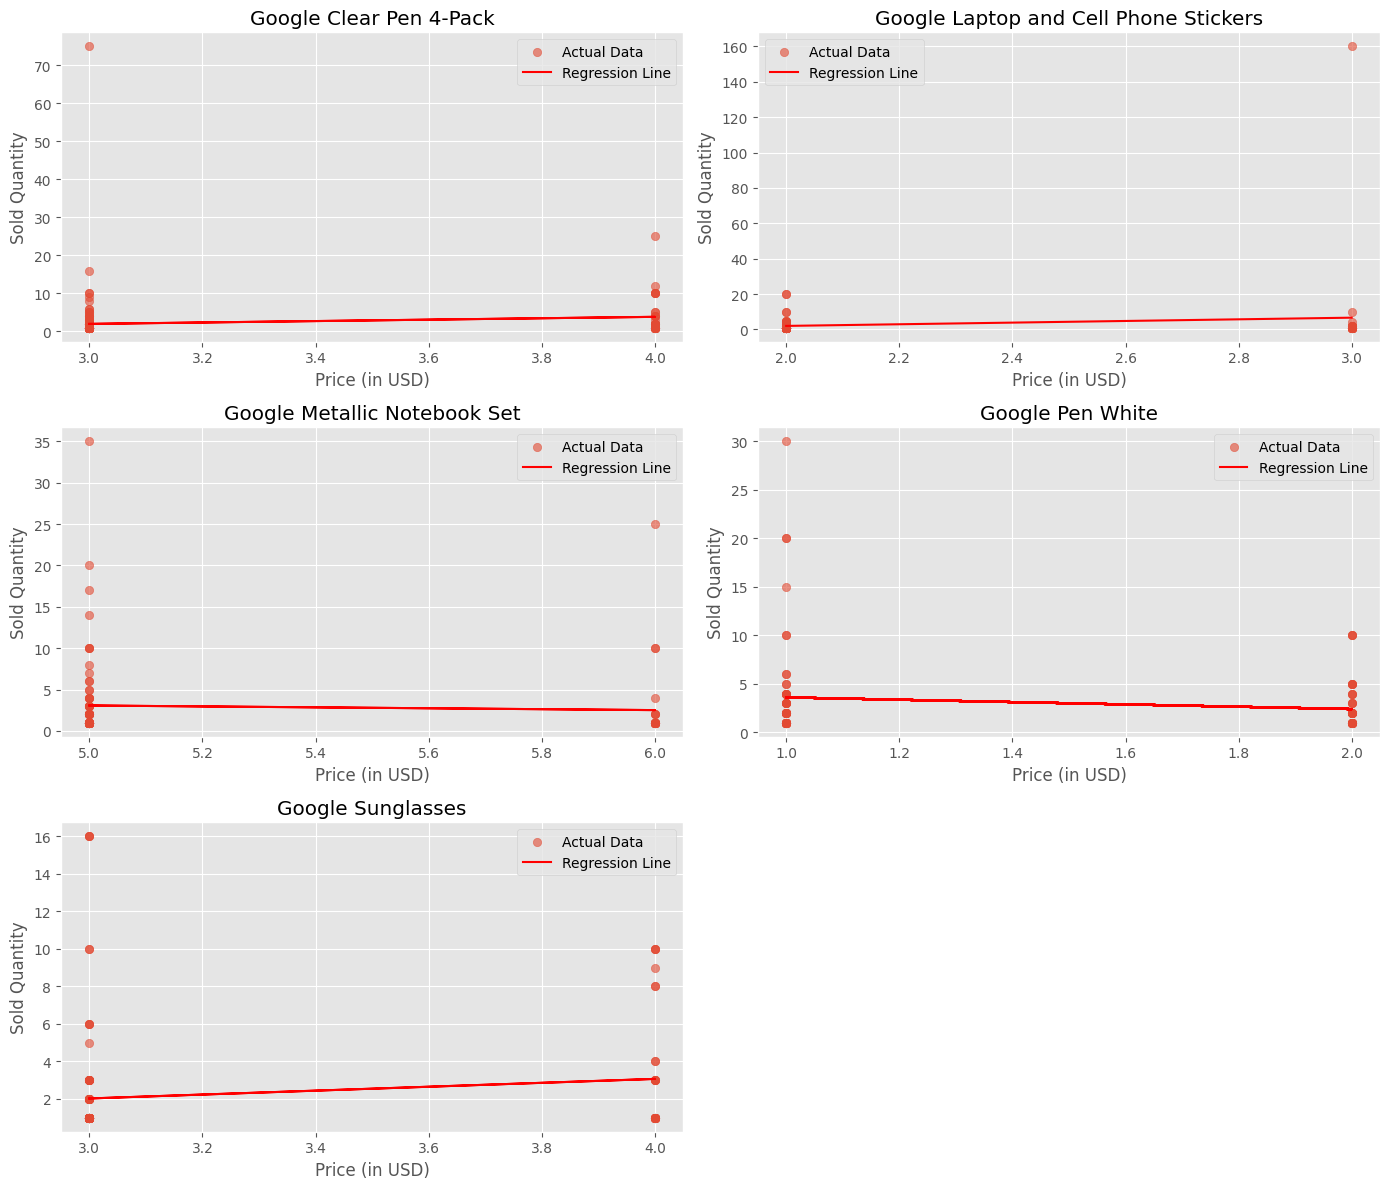

In [14]:
# Extract the regression parameters
regression_params = {
    'Google Clear Pen 4-Pack': {'Coefficient': 1.8592375366568896, 'Intercept': -3.5884652981427116},
    'Google Laptop and Cell Phone Stickers': {'Coefficient': 4.65639724537876, 'Intercept': -7.324030445813699},
    'Google Metallic Notebook Set': {'Coefficient': -0.557758620689655, 'Intercept': 5.863793103448275},
    'Google Pen White': {'Coefficient': -1.20377358490566, 'Intercept': 4.80754716981132},
    'Google Sunglasses': {'Coefficient': 1.0434108527131785, 'Intercept': -1.1069767441860474}
}

# Create regression line plots for each item
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Remove the last subplot since we only need 5 plots
fig.delaxes(axes[-1])

# Plot each item's data points and regression line
for ax, item in zip(axes, regression_params.keys()):
    item_data = df[df['item_name'] == item]

    # Scatter plot of actual data points
    ax.scatter(item_data['price_in_usd'], item_data['sold_quantity_on_that_date'], alpha=0.6, label='Actual Data')

    # Plot the regression line
    x_vals = item_data['price_in_usd']
    y_vals = regression_params[item]['Coefficient'] * x_vals + regression_params[item]['Intercept']
    ax.plot(x_vals, y_vals, color='red', label='Regression Line')

    ax.set_title(item)
    ax.set_xlabel('Price (in USD)')
    ax.set_ylabel('Sold Quantity')
    ax.legend()

plt.tight_layout()
plt.show()


---